In [2]:
# Task 1.1: Load and Inspect
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 200)

# Load dataset (change filename if needed)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print('Shape:', df.shape)
print('\nColumns:\n', df.columns.tolist())
df.head(3)

Shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('TotalCharges NaN count after convert:', df['TotalCharges'].isna().sum())

# Show rows with NaN in TotalCharges (if any)
if df['TotalCharges'].isna().sum() > 0:
    display(df[df['TotalCharges'].isna()].head())

# Strategy: fill missing TotalCharges with median
median_total = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total, inplace=True)

# Drop irrelevant columns if present
if 'customerID' in df.columns:
    df = df.drop(['customerID'], axis=1)

# Missing values per column
print('\nMissing values per column:')
print(df.isnull().sum())

# Basic info
print('\nData types:')
print(df.dtypes)

TotalCharges NaN count after convert: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No



Missing values per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
To

C:\Users\tanay\AppData\Local\Temp\ipykernel_21964\4188706939.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total, inplace=True)


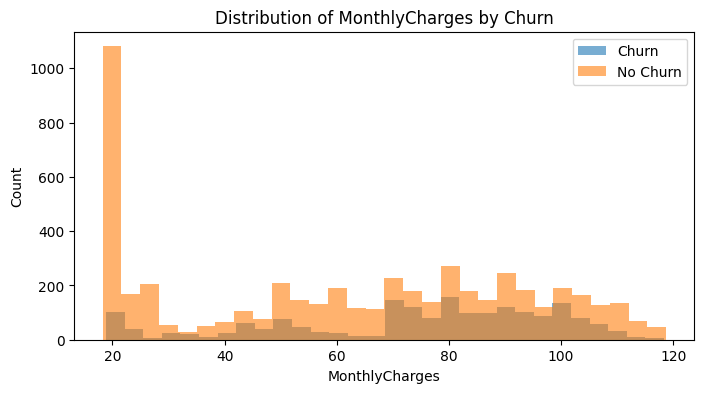

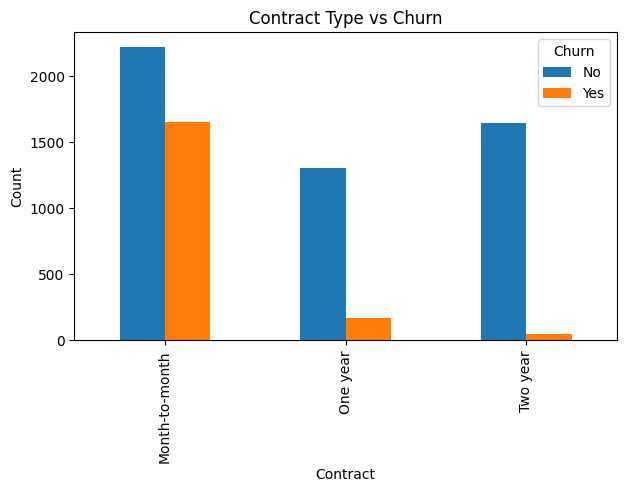

Churn                          No          Yes
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2552.882494  1531.796094
               std    2327.590132  1890.822994
               min      18.800000    18.850000
               25%     579.575000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

In [ ]:
# Histogram of MonthlyCharges for churned vs non-churned
plt.figure(figsize=(8,4))
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=30, alpha=0.6, label='Churn')
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], bins=30, alpha=0.6, label='No Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Distribution of MonthlyCharges by Churn')
plt.legend()
plt.show()

# Bar chart: Contract vs Churn
ct = pd.crosstab(df['Contract'], df['Churn'])
ct.plot(kind='bar', stacked=False, figsize=(7,4))
plt.title('Contract Type vs Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

# Numerical summary split by churn
display(df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].describe().transpose())

### EDA summary
1. Customers who churn tend to have slightly higher MonthlyCharges on average.
2. Contract type matters: month-to-month customers show higher churn than one- or two-year contracts.
3. Tenure is lower for churned customers (they leave earlier).
4. TotalCharges had non-numeric entries which were converted to NaN and imputed with the median.



In [ ]:
df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)
df['IsLongTerm'] = (df['tenure'] > 24).astype(int)
df[['tenure','MonthlyCharges','TotalCharges','AvgChargesPerMonth','IsLongTerm']].head()

,tenure,MonthlyCharges,TotalCharges,AvgChargesPerMonth,IsLongTerm
0,1,29.85,29.85,14.925000,0
1,34,56.95,1889.50,53.985714,1
2,2,53.85,108.15,36.050000,0
3,45,42.30,1840.75,40.016304,1
4,2,70.70,151.65,50.550000,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes':1, 'No':0})

num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print('Numerical cols:', num_cols)
print('Categorical cols:', cat_cols)

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

pipeline_logistic = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=200, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline_logistic.fit(X_train, y_train)
print('Logistic pipeline trained.')

Numerical cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']
Categorical cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Logistic pipeline trained.


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic': LogisticRegression(max_iter=200, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    p = Pipeline([('pre', preprocessor), ('clf', clf)])
    p.fit(X_train, y_train)
    pred = p.predict(X_test)
    print('\nModel:', name)
    print(classification_report(y_test, pred))
    if hasattr(p.named_steps['clf'], 'predict_proba'):
        print('ROC AUC:', roc_auc_score(y_test, p.predict_proba(X_test)[:,1]))


Model: Logistic
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

ROC AUC: 0.847156991914025

Model: RandomForest
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

ROC AUC: 0.8223152238497506

Model: GradientBoosting
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro a

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))])

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [5, 10, None]
}

grid = GridSearchCV(rf_pipe, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best CV score:', grid.best_score_)

best_rf = grid.best_estimator_

Best params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
Best CV score: 0.7897233696602267


## Task 5 — Handling Class Imbalance
Compare RandomForest with and without class_weight.

In [9]:
# Without class weight
rf_no_weight = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))])
rf_no_weight.fit(X_train, y_train)
pred_no = rf_no_weight.predict(X_test)

# With class weight
rf_weight = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42))])
rf_weight.fit(X_train, y_train)
pred_w = rf_weight.predict(X_test)

from sklearn.metrics import f1_score
print('F1 (no weight):', f1_score(y_test, pred_no))
print('F1 (weight):   ', f1_score(y_test, pred_w))

print('\nClassification report (no weight)') 
print(classification_report(y_test, pred_no))
print('\nClassification report (weight)') 
print(classification_report(y_test, pred_w))

F1 (no weight): 0.5376661742983752
F1 (weight):    0.5279034690799397

Classification report (no weight)
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Classification report (weight)
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



## Task 6 — Final Evaluation and Interpretation

Final Model — Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

Final ROC AUC: 0.8384923402826215


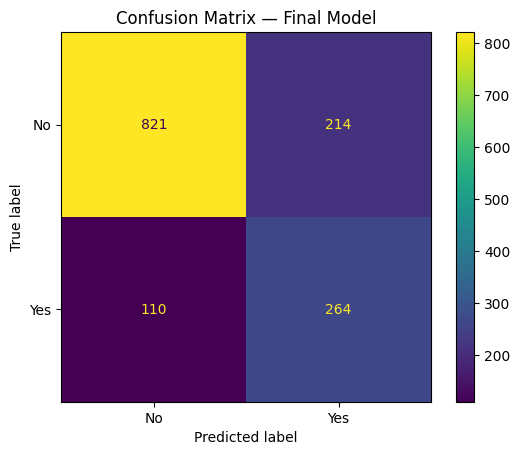

In [10]:
# Evaluate best_rf on the test set
final_model = best_rf
final_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
print('Final Model — Classification Report')
print(classification_report(y_test, final_pred))
if hasattr(final_model.named_steps['clf'], 'predict_proba'):
    print('Final ROC AUC:', roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1]))

# Plot confusion matrix
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, display_labels=['No','Yes'])
plt.title('Confusion Matrix — Final Model')
plt.show()

False Positive (predict churn but customer would stay):company may offer retention incentives unnecessarily, increasing cost.
False Negative (predict stay but customer churns): company misses customer likely to leave, leading to lost revenue and higher acquisition cost to replace the customer.

Typically, False Negatives are more costly in churn prediction, so higher recall on the churn class is often prioritized, even if precision falls.

In [ ]:
# Get onehot encoder and numeric names
onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_onehot_names = onehot.get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(cat_onehot_names)

# Get importances
clf = final_model.named_steps['clf']
importances = clf.feature_importances_

import pandas as pd
imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)
imp_df = imp_df.reset_index(drop=True)
imp_df

,feature,importance
0,Contract_Month-to-month,0.109595
1,tenure,0.104215
2,TotalCharges,0.099487
3,AvgChargesPerMonth,0.077374
4,MonthlyCharges,0.067364
5,Contract_Two year,0.063488
6,OnlineSecurity_No,0.055069
7,InternetService_Fiber optic,0.036044
8,TechSupport_No,0.035227
9,PaymentMethod_Electronic check,0.030970


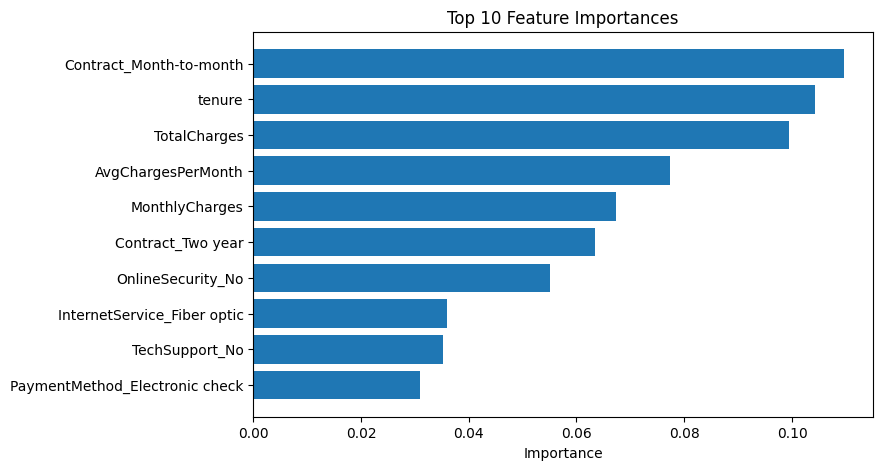

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(imp_df['feature'][::-1], imp_df['importance'][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()